In [1]:
import pandas as pd
import wget
import os
import lmfit
from lmfit.models import StepModel, ExponentialModel, PolynomialModel


DataSource = 'OurWorldData'

if DataSource == 'JohnHopkins':
    fname = 'time_series_19-covid-Confirmed.csv'

    if os.path.exists(fname):
        os.remove(fname)

    ddir = 'data/'
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
    ff = wget.download(url)
    print (ff)
    assert ff == fname, f'File name retrieved {ff} changed name? {fname}'

    dd = pd.read_csv(ff)

else:
    fname = 'full_data.csv'
    if os.path.exists(fname):
        os.remove(fname)
    
    url = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
    ff = wget.download(url)
    assert ff == fname, f'File name retrieved {ff} changed name? {fname}'
    dd = pd.read_csv(ff, parse_dates = ['date'])
    
    
## Data source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series



In [2]:
dd['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guam', 'Guatemala',
       'Guinea', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'International', 'Iran', 'Iraq', 'Ireland', 'Israel',
 

In [3]:
dd['date'][0] 

Timestamp('2019-12-31 00:00:00')

           date location  new_cases  new_deaths  total_cases  total_deaths
1008 2020-03-04    Chile          1           0            1             0
1009 2020-03-05    Chile          2           0            3             0
1010 2020-03-06    Chile          1           0            4             0
1011 2020-03-07    Chile          1           0            5             0
1012 2020-03-09    Chile          5           0           10             0
1013 2020-03-10    Chile          3           0           13             0
1014 2020-03-11    Chile          4           0           17             0
1015 2020-03-12    Chile          6           0           23             0
1016 2020-03-13    Chile         10           0           33             0
1017 2020-03-14    Chile         10           0           43             0
1018 2020-03-15    Chile         18           0           61             0
1019 2020-03-16    Chile         14           0           75             0
1020 2020-03-17    Chile 

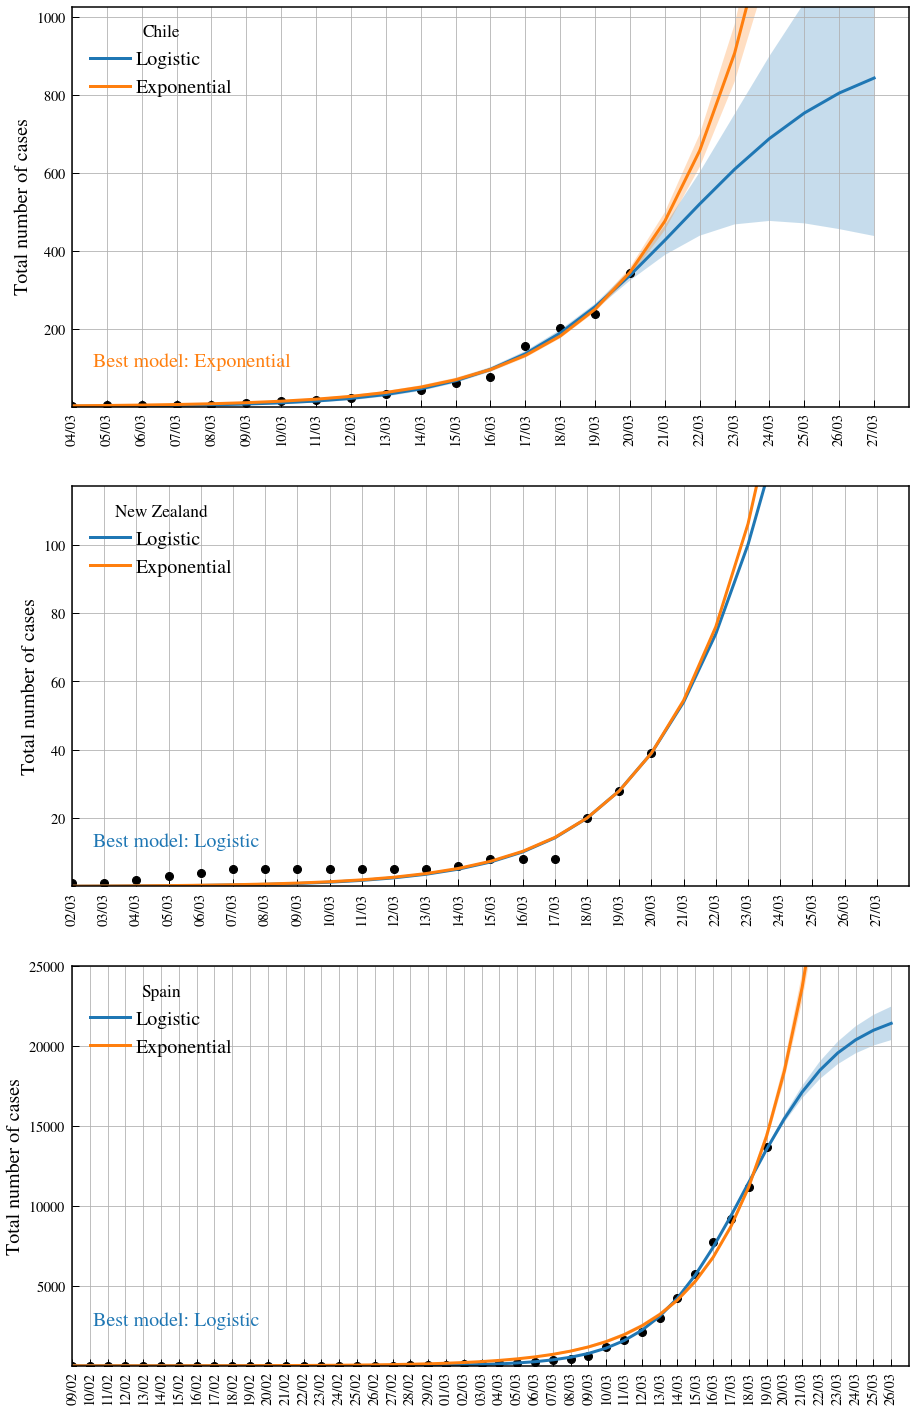

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

countries = ['Chile','New Zealand', 'Spain']
ncountries = len(countries)
models= {'Logistic': StepModel(form='logistic'), 
        'Exponential': ExponentialModel() }#,
        #'3rd deg. Polynomial': PolynomialModel(degree=3)}

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
fig, axs = plt.subplots(ncountries,figsize=(15,25))
plt.rcParams['legend.title_fontsize'] = 'xx-large'

countryvar = 'location' if DataSource == 'OurWorldData' else 'Country/Region'

for icc,country in enumerate(countries):

    sel = dd[countryvar] == country
    dc = dd.loc[sel]
    print (dc)
    cols = list(dc.columns)
    dates = cols[4:] if DataSource == 'JohnHopkins' else dc['date'].reset_index(drop=True)

    if DataSource == 'JohnHopkins':
        nn = []
        for i in dates:
            nn.append(dc[i].to_numpy()[0])
    else:
        nn = dc['total_cases'].reset_index(drop=True).to_numpy()
        
    xstart = 0
    
    for ii, inn in enumerate(list(nn)):
        if inn > 1:
            xstart = ii-1 if ii > 1 else 0
            break
#    import pdb ; pdb.set_trace()        
    nn = nn[xstart:]
    print (dates.iloc[xstart], xstart)
    dates = dates.iloc[xstart:].reset_index(drop=True)
    
    # ensuring data completeness    
    dates_all = pd.date_range(start=dates.iloc[0], end=dates.iloc[-1])
    ntotal = [] #np.zeros(len(dates_all))
    iid = 0
    for ixx, idate in enumerate(dates_all):
        if dates.iloc[iid] == idate:
            ntotal.append(nn[iid])
            iid += 1
        else:
            ntotal.append(ntotal[ixx-1])
    
    #import pdb ; pdb.set_trace()
    add_data_manually = True  # to add latest info not in the database yet
    
    if add_data_manually:
        if country == 'Chile':
            ntotal.append(342)
            dates_all = pd.date_range(start=dates.iloc[0], periods = len(dates_all)+1)
        if country == 'New Zealand':
            ntotal.append(39)
            dates_all = pd.date_range(start=dates.iloc[0], periods = len(dates_all)+1)
    
    nn = ntotal
    dates = dates_all
    xstart = 0

    print (country, xstart)
    ndata = len(nn)
    nn = np.array(nn)
    xx = np.arange(0,ndata)
    xxx = np.arange(0,ndata+7)
    nper = len(xxx)
    print (country, nper)
    xxxx = np.arange(0,ndata+7)# if nper < 100 else 2)
    datesxxx = pd.date_range(start=dates[0], periods=nper).strftime('%d/%m')
    
    #import pdb ; pdb.set_trace()    
    
    print (datesxxx)
     
    ax = axs[icc]
    
    ax.set_xticks(xxxx)
    ax.set_xticklabels(datesxxx[xxxx], rotation='vertical')
    ax.plot(xx,nn,'ko',markersize=8)
    #ax.set_yscale('log')

    icol = 0 
    ixx = np.where(nn > 10)[0] if country == 'Spain' else np.where(nn > 8)[0]
    bics = []
    mn = []
    
    for mname, model in models.items():
       
        pars0 = model.guess(nn[ixx], x=xx[ixx])
        out = model.fit(nn[ixx], pars0, x=xx[ixx])
        pars = out.params
        bics.append(out.bic)
        mn.append(mname)
 
        dely = out.eval_uncertainty(x=xxx)
        y =  out.eval(pars,x=xxx)        
        ax.plot(xxx,y, '-', label=f'{mname}', color=colors[icol],linewidth=3)
        ax.fill_between(xxx, y-dely,y+dely,facecolor=colors[icol],alpha=0.25)
        icol += 1
        
       # print (mname, country, y[len(xx) + 11], bics[-1])
    
    bic = np.argmin(bics)
    ax.text(0.025,0.1,f'Best model: {mn[bic]}', fontsize=20,
           transform=ax.transAxes, color= colors[bic])


    ax.set_xlim([0,ndata + 7])
    ax.set_ylim([0.1,np.min([25000, np.max(nn)*3])])
    ax.ticklabel_format(axis='y', style='sci',useMathText=True, scilimits=(0,5))
    ax.set_ylabel('Total number of cases',fontsize=20)
    ax.legend(title=country, fontsize=20,loc='upper left')
    ax.grid()
    

plt.show()


#popt2, pcov2 = curve_fit(sigmoid, np.arange(ndata), nn, sigma= err,p0=[.001, .1,.1],absolute_sigma=True)


#print (popt)

In [14]:
data = 'data/Metadata_Indicator_API_EN.POP.DNST_DS2_en_csv_v2_887474.csv'
df = pd.read_csv(data)
df

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,EN.POP.DNST,Population density (people per sq. km of land ...,Population density is midyear population divid...,Food and Agriculture Organization and World Ba...,NaN


In [ ]:

d


